In [1]:
#install.packages("plotrix")
library(plotrix)
library(ggpubr)
library(ggplot2)
library(dplyr)

Loading required package: ggplot2
Loading required package: magrittr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
cleaned_data <- read.csv("dataset/clean_data.csv")
typeof(cleaned_data)
head(cleaned_data)
attach(cleaned_data)

[1] "list"

X,statut,age,expérience.professionnelle,temps.passé.moyen.sur.internet,appareil.préféré.de.consultation,nombre.de.boites.mail,nombre.de.messagerie.consultées.régulièrement,fréquence.de.consultation.de.la.messagerie,nombre.de.mails.reçus.par.jour,...,lecture.de.tous.les.mails,lecture.de.l.objet.expéditeur,nombre.de.mails.non.lus,nombre.de.mails.envoyés.par.semaine,réponse.à.des.mails.nécessitant.une.réponse,consultation.de.mails.en.dehors.des.heures.de.travail.études,personnalisation.de.la.messagerie,importance.de.l.ergonomie,sentiment.envers.de.zéro.inbox,autre.fonctionnalité.de.la.boite.mail
1,3A,23,Expérience > 6 mois,6,Un ordinateur,3,2,< 10,5,...,En grande partie,Oui,0,4,oui,oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
2,Enseignant,34,Ça se compte en années,7,Un ordinateur,3,2,> 10,50,...,Quasiment tous,Oui,5,100,oui,oui,Oui,Très importante,Lire tous les mails,"Oui, souvent"
3,1A,20,Entre 1 et 6 mois,4,Un smartphone,5,4,< 3,2,...,Rarement,Oui,0,1,Oui,Non,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
4,Autre,26,Expérience > 6 mois,8,Un ordinateur,2,2,> 10,10,...,Rarement,Oui,0,3,Parfois,Non,Oui,Relativement importante,Marquer tout en lu,"Oui, parfois"
6,Enseignant,35,Ça se compte en années,5,Un ordinateur,2,2,> 10,20,...,Rarement,Oui,0,50,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
7,Enseignant,56,Ça se compte en années,8,Un ordinateur,2,2,> 30,30,...,En grande partie,Oui,9526,30,Parfois,Oui,Non,Pas tellement importante,Avoir 10.000 mails non lus,"Oui, parfois"


## Répartition par statut ou profession

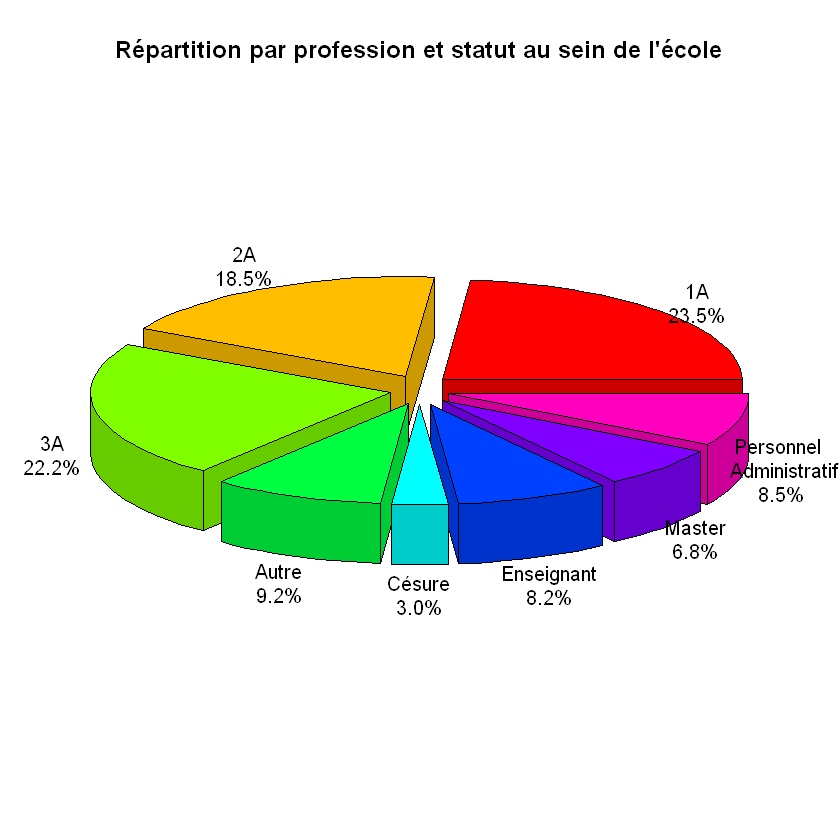

In [3]:

table2<-table(statut)
#prop.table(table2)*100
percentage <- apply( 
    prop.table(table2)*100, 
    1, 
    function(u) sprintf( "%.1f%%", u )
    )
    

    
    
#pie(table(cleaned_data$statut), main="Répartition par profession et statut au sein de l'école")
Dpie <- pie3D(table(statut), main="Répartition par profession et statut au sein de l'école", explode=0.1)
lbls <- c("1A","2A","3A","Autre","Césure","Enseignant","Master","Personnel \n Administratif")
pie3D.labels(Dpie,labels=paste(lbls,percentage, sep = "\n"), radius=1, labelcex=1)



### Répartition par âge

In [4]:
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   21.00   22.00   25.98   25.00   65.00 

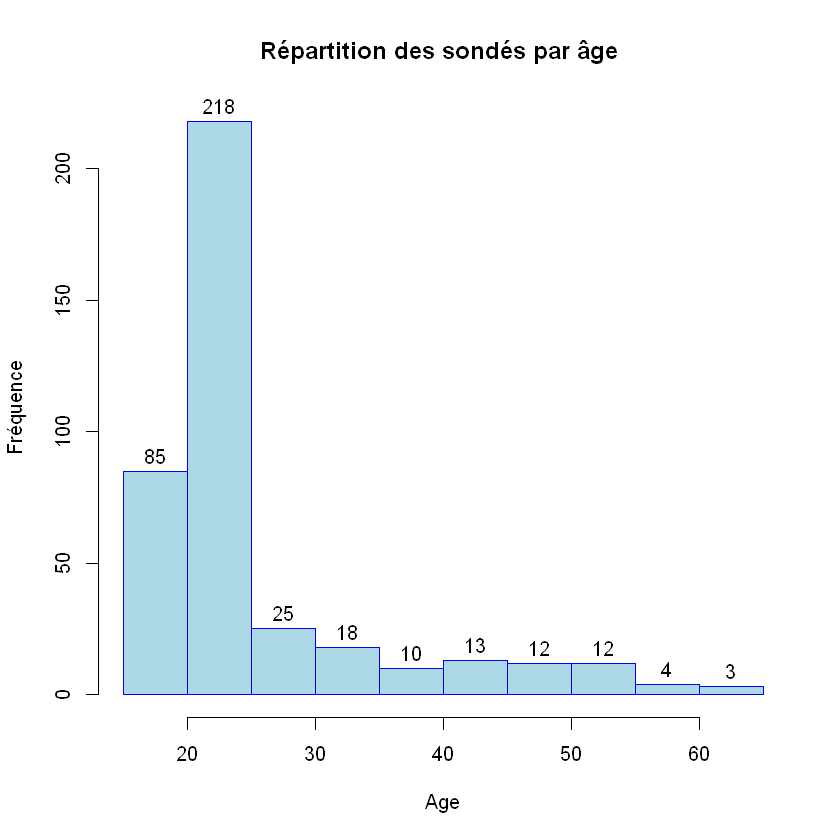

In [5]:
hist(age, main="Répartition des sondés par âge ",xlab = "Age", ylab = "Fréquence" ,col = "lightblue", freq = TRUE, border = "blue", labels = TRUE)
#curve(dnorm(x, mean(cleaned_data$age), sd(cleaned_data$age)), col="Red", lwd=4, add=TRUE)

### Répartition par expérience professionnelle

In [6]:
experience <- as.factor(expérience.professionnelle)
levels(experience)
#as.numeric(experience)

[1] "Ça se compte en années" "Entre 1 et 6 mois"      "Expérience > 6 mois"   
[4] "Sans Expérience"

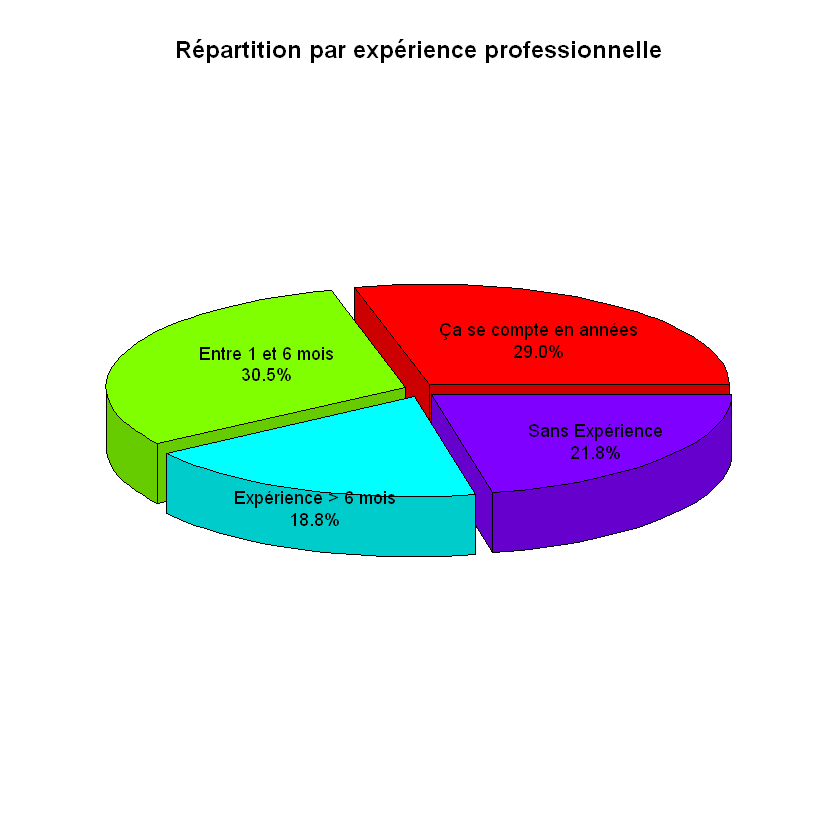

In [7]:
table3<-table(expérience.professionnelle)
#prop.table(table2)*100
percentage1 <- apply( 
    prop.table(table3)*100, 
    1, 
    function(u) sprintf( "%.1f%%", u )
    ) 
    
#pie(table(cleaned_data$statut), main="Répartition par profession et statut au sein de l'école")
Dpie1 <- pie3D(table(expérience.professionnelle), main="Répartition par expérience professionnelle", explode=0.05)
lbls1 <- c("Ça se compte en années","Entre 1 et 6 mois","Expérience > 6 mois","Sans Expérience")
pie3D.labels(Dpie1,labels=paste(lbls1,percentage1, sep = "\n"), radius=0.3, labelcex=.9, labelrad=2,minsep=2)


In [8]:
table(cleaned_data[which(expérience.professionnelle=="Ça se compte en années"),]$statut)
table(cleaned_data[which(expérience.professionnelle=="Ça se compte en années"),]$age)
table(cleaned_data[which(statut=="Master"),]$age)


                     1A                      2A                      3A 
                      6                       8                       8 
                  Autre                  Césure              Enseignant 
                     21                       0                      32 
                 Master Personnel Administratif 
                     10                      31 


20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 47 
 3  7  6  3  4  3  5  2  3  5  6  2  4  1  4  5  4  1  1  1  2  2  2  2  7  3 
48 50 51 52 53 54 55 56 57 62 65 
 4  5  2  2  4  2  2  3  1  2  1 


22 23 24 25 26 27 28 29 30 32 34 35 
 3  6  4  3  3  2  1  1  1  1  1  1 

## ANALYSE DES REPONSES

In [9]:
names(cleaned_data)

[1] "X"                                                           
 [2] "statut"                                                      
 [3] "age"                                                         
 [4] "expérience.professionnelle"                                  
 [5] "temps.passé.moyen.sur.internet"                              
 [6] "appareil.préféré.de.consultation"                            
 [7] "nombre.de.boites.mail"                                       
 [8] "nombre.de.messagerie.consultées.régulièrement"               
 [9] "fréquence.de.consultation.de.la.messagerie"                  
[10] "nombre.de.mails.reçus.par.jour"                              
[11] "concerné"                                                    
[12] "notification.de.mails"                                       
[13] "lecture.de.tous.les.mails"                                   
[14] "lecture.de.l.objet.expéditeur"                               
[15] "nombre.de.mails.non.lus"                                     
[16] "nombre.de.mails.envoyés.par.semaine"                         
[17] "réponse.à.des.mails.nécessitant.une.réponse"                 
[18] "consultation.de.mails.en.dehors.des.heures.de.travail.études"
[19] "personnalisation.de.la.messagerie"                           
[20] "importance.de.l.ergonomie"                                   
[21] "sentiment.envers.de.zéro.inbox"                              
[22] "autre.fonctionnalité.de.la.boite.mail"

## Lecture des mails

In [10]:
unique(lecture.de.tous.les.mails)

[1] En grande partie Quasiment tous   Rarement        
Levels: En grande partie Quasiment tous Rarement

#### Répartition générale

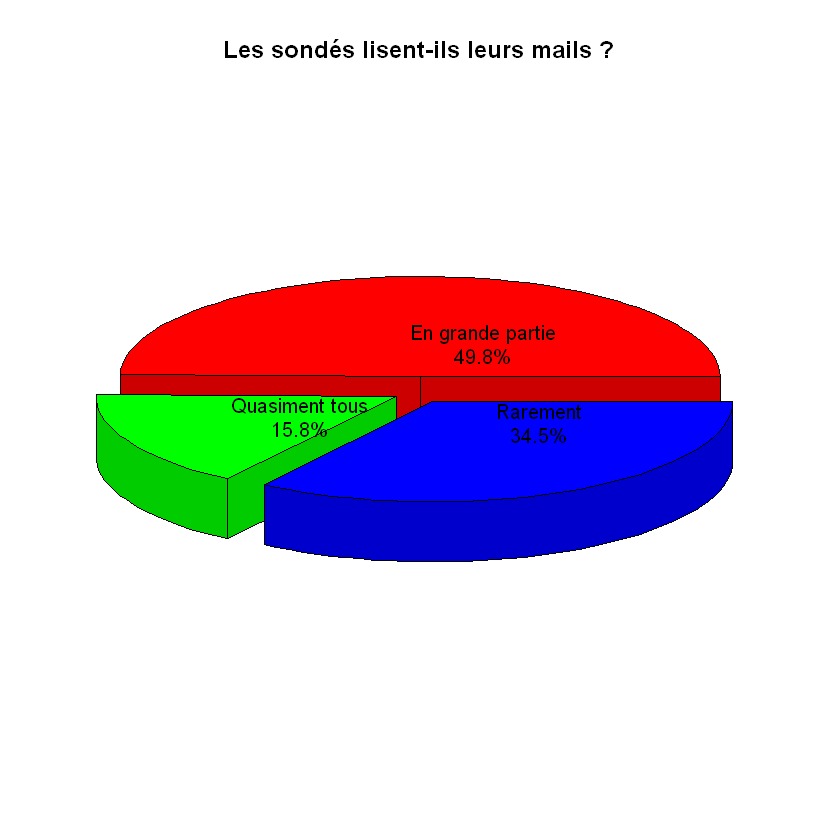

In [11]:
table4<-table(lecture.de.tous.les.mails)
#prop.table(table2)*100
percentage1 <- apply( 
    prop.table(table4)*100, 
    1, 
    function(u) sprintf( "%.1f%%", u )
    ) 
    
#pie(table(cleaned_data$statut), main="Répartition par profession et statut au sein de l'école")
Dpie1 <- pie3D(table(lecture.de.tous.les.mails), main="Les sondés lisent-ils leurs mails ?", explode=0.09)
lbls1 <- c("En grande partie","Quasiment tous","Rarement")
pie3D.labels(Dpie1,labels=paste(lbls1,percentage1, sep = "\n"), radius=0.2, labelcex=1, labelrad=2,minsep=3.15)


#### En fonction du statut

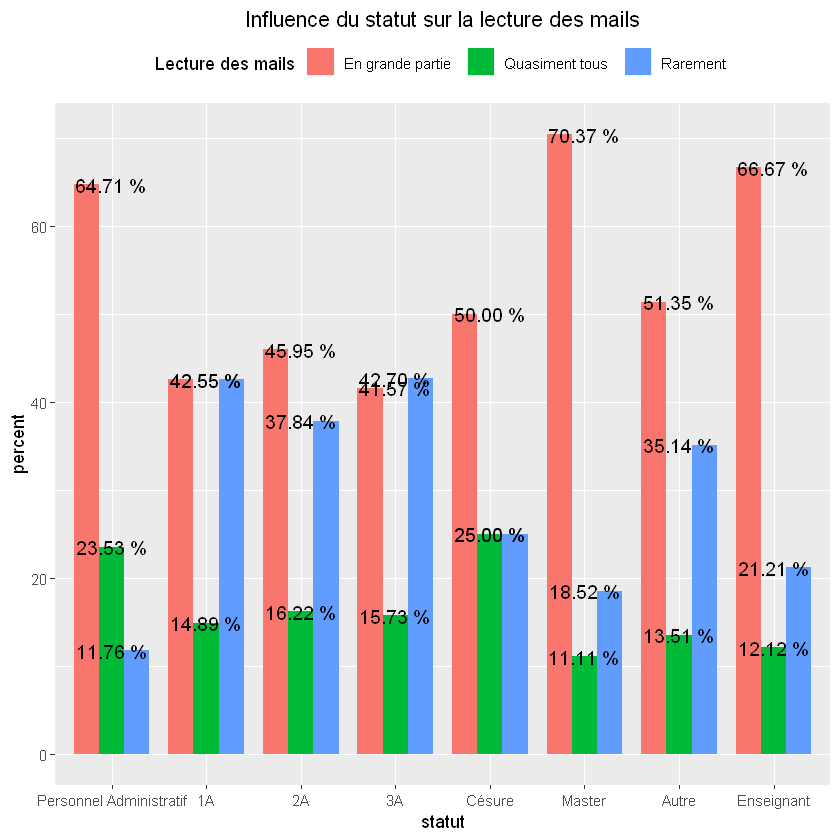

In [12]:
## new dataframe to add count and percentage columns, look head(df2) below
df7 <- cleaned_data %>% 
  group_by(statut,lecture.de.tous.les.mails) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(d2$perc*100, 2), nsmall = 2) to round and formatt decimals
df7$lab <- paste(format(round(df7$perc*100, 2), nsmall = 2), "%") 

ggplot(df7, aes(x = factor(statut), y = perc*100, fill = factor(lecture.de.tous.les.mails))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Influence du statut sur la lecture des mails")+
  labs(x = "statut", y = "percent", fill = "Lecture des mails") +
  scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df7,aes(x=statut,y=perc*100,label=lab),position = position_dodge(width = 0.005), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

In [13]:
df7

statut,lecture.de.tous.les.mails,count,perc,lab
1A,En grande partie,40,0.4255319,42.55 %
1A,Quasiment tous,14,0.1489362,14.89 %
1A,Rarement,40,0.4255319,42.55 %
2A,En grande partie,34,0.4594595,45.95 %
2A,Quasiment tous,12,0.1621622,16.22 %
2A,Rarement,28,0.3783784,37.84 %
3A,En grande partie,37,0.4157303,41.57 %
3A,Quasiment tous,14,0.1573034,15.73 %
3A,Rarement,38,0.4269663,42.70 %
Autre,En grande partie,19,0.5135135,51.35 %


#### En fonction de l'expérience

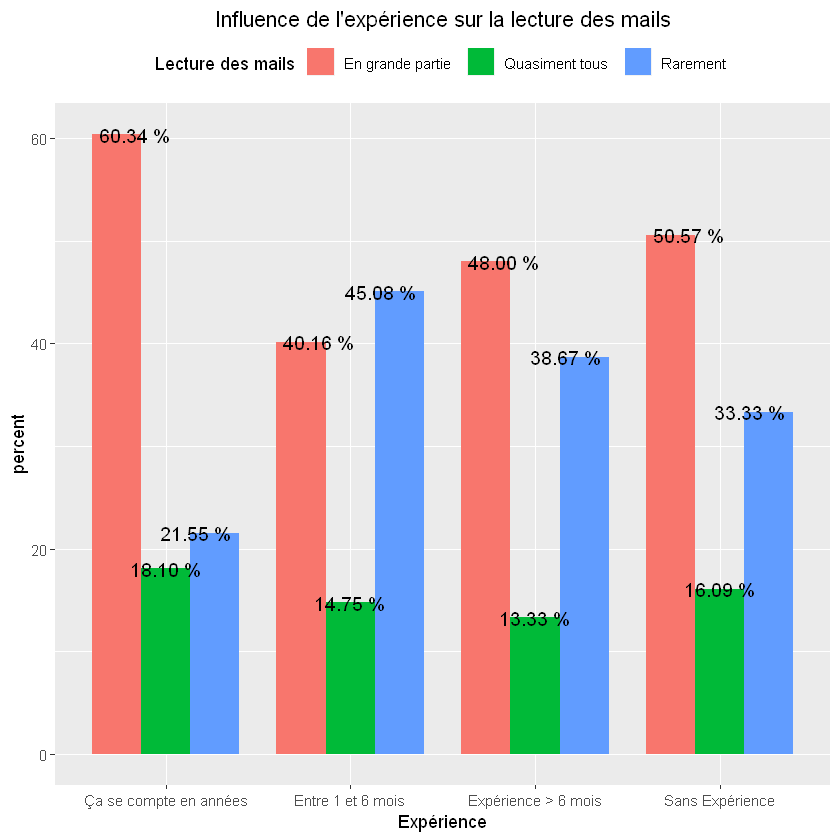

In [14]:
## new dataframe to add count and percentage columns, look head(df2) below
df8 <- cleaned_data %>% 
  group_by(expérience.professionnelle,lecture.de.tous.les.mails) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(d2$perc*100, 2), nsmall = 2) to round and formatt decimals
df8$lab <- paste(format(round(df8$perc*100, 2), nsmall = 2), "%") 

ggplot(df8, aes(x = factor(expérience.professionnelle), y = perc*100, fill = factor(lecture.de.tous.les.mails))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Influence de l'expérience sur la lecture des mails")+
  labs(x = "Expérience", y = "percent", fill = "Lecture des mails") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df8,aes(x=expérience.professionnelle,y=perc*100,label=lab),position = position_dodge(width = 0.5), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

#### En Fonction de l'age

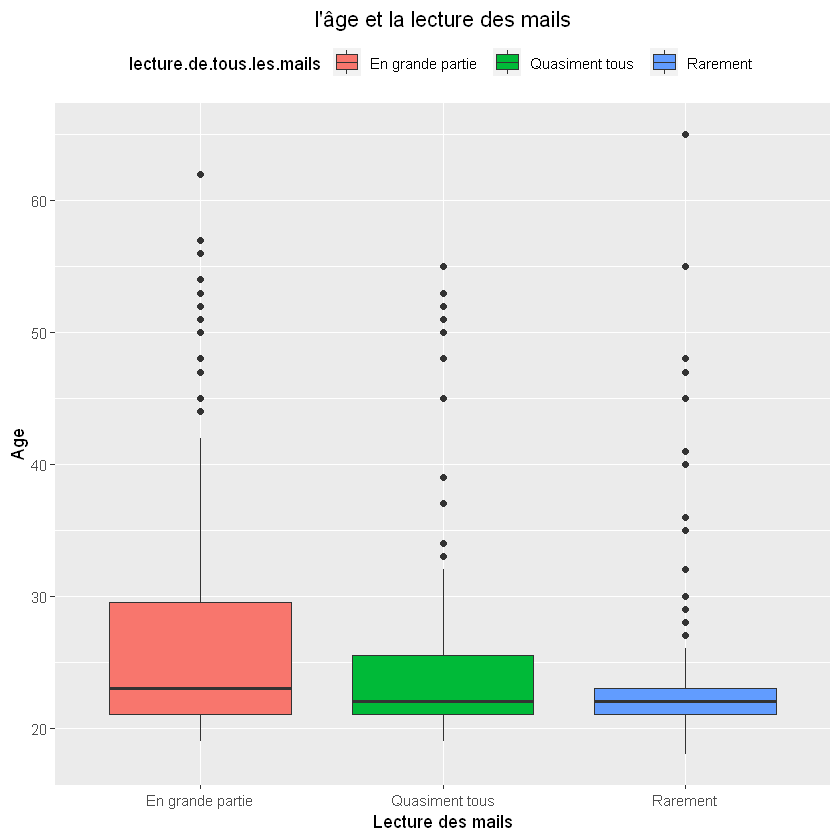

In [15]:
ggplot(cleaned_data, aes(x=lecture.de.tous.les.mails, y=age, fill=lecture.de.tous.les.mails))+
    geom_boxplot()+
    labs(title="l'âge et la lecture des mails",x="Lecture des mails", y = "Age")+    
    theme(legend.position = "top", plot.title = element_text(hjust = 0.5))

#### En Fonction de l'appareil

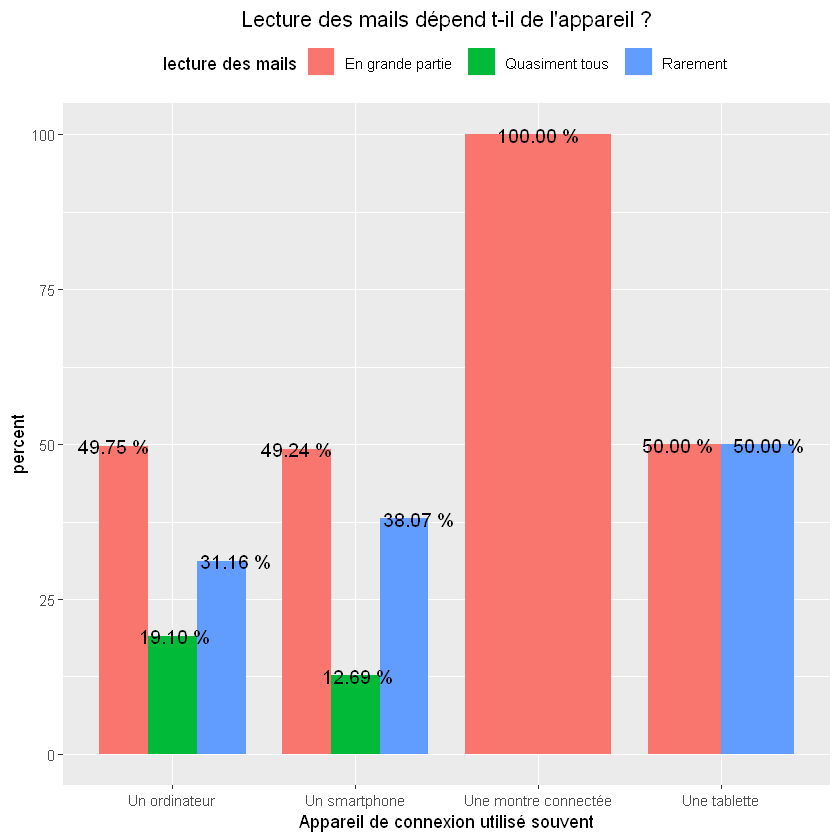

In [16]:
## new dataframe to add count and percentage columns, look df3 below
df9 <- cleaned_data %>% 
  group_by(appareil.préféré.de.consultation,lecture.de.tous.les.mails) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df9$lab <- paste(format(round(df9$perc*100, 2), nsmall = 2), "%") 

ggplot(df9, aes(x = factor(appareil.préféré.de.consultation), y = perc*100, fill = factor(lecture.de.tous.les.mails))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Lecture des mails dépend t-il de l'appareil ?")+
  labs(x = "Appareil de connexion utilisé souvent", y = "percent", fill = "lecture des mails") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df9,aes(x=appareil.préféré.de.consultation,y=perc*100,label=lab),position = position_dodge(width = 1), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

#### Etre concerné par le mail

In [17]:
unique(concerné)

[1] Rarement Souvent  Toujours Jamais  
Levels: Jamais Rarement Souvent Toujours

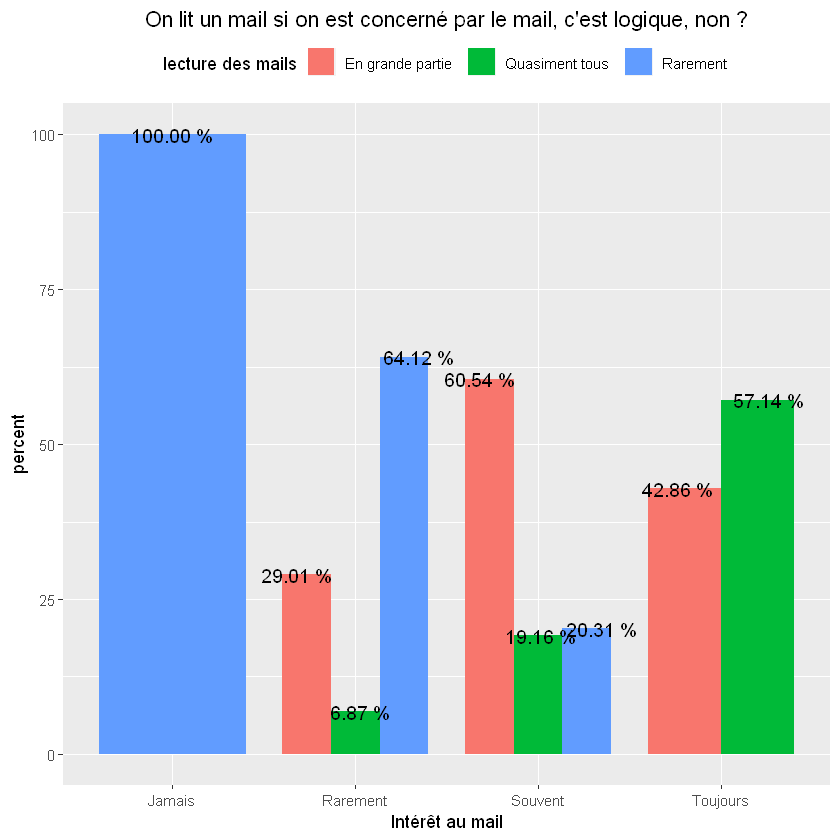

In [18]:
## new dataframe to add count and percentage columns, look df3 below
df10 <- cleaned_data %>% 
  group_by(concerné,lecture.de.tous.les.mails) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df10$lab <- paste(format(round(df10$perc*100, 2), nsmall = 2), "%") 

ggplot(df10, aes(x = factor(concerné), y = perc*100, fill = factor(lecture.de.tous.les.mails))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("On lit un mail si on est concerné par le mail, c'est logique, non ?")+
  labs(x = "Intérêt au mail", y = "percent", fill = "lecture des mails") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df10,aes(x=concerné,y=perc*100,label=lab),position = position_dodge(width = 1), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

## Fréquence de consultation

In [19]:
unique(fréquence.de.consultation.de.la.messagerie)

[1] < 10 > 10 < 3  > 30
Levels: < 10 < 3 > 10 > 30

### En fonction du statut au sein de l'école

#### by Count

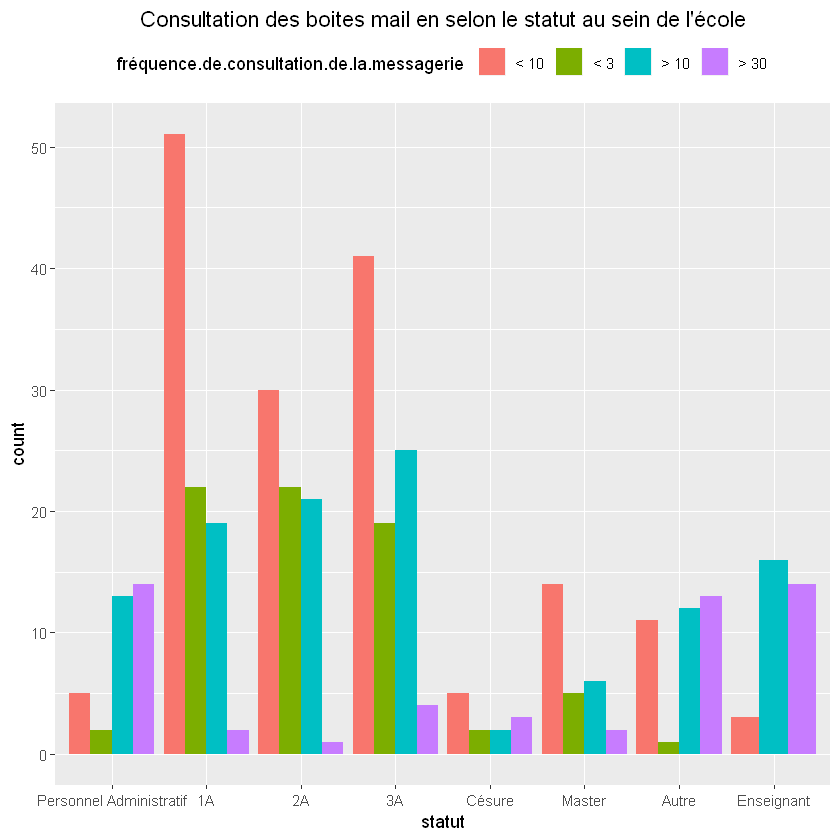

In [20]:
#ggplot(cleaned_data, aes(x=fréquence.de.consultation.de.la.messagerie, y=(..count..)/sum(..count..))) +     geom_bar(aes(fill = statut), position = "dodge")

ggplot(cleaned_data, aes(x=statut, y=..count..)) + 
    geom_bar(aes(fill = fréquence.de.consultation.de.la.messagerie), position = "dodge")+
    ggtitle("Consultation des boites mail en selon le statut au sein de l'école")+
    scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
    theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
     #coord_flip()    c pour tourner les bar charts


#### by Percentage

In [21]:
## new dataframe to add count and percentage columns, look head(df2) below
df2 <- cleaned_data %>% 
  group_by(statut,fréquence.de.consultation.de.la.messagerie) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

In [22]:
unique(df2$fréquence.de.consultation.de.la.messagerie)

[1] < 10 < 3  > 10 > 30
Levels: < 10 < 3 > 10 > 30

In [23]:
df2$fréquence.de.consultation.de.la.messagerie <-ordered(df2$fréquence.de.consultation.de.la.messagerie, levels=c("< 3","< 10","> 10","> 30"))

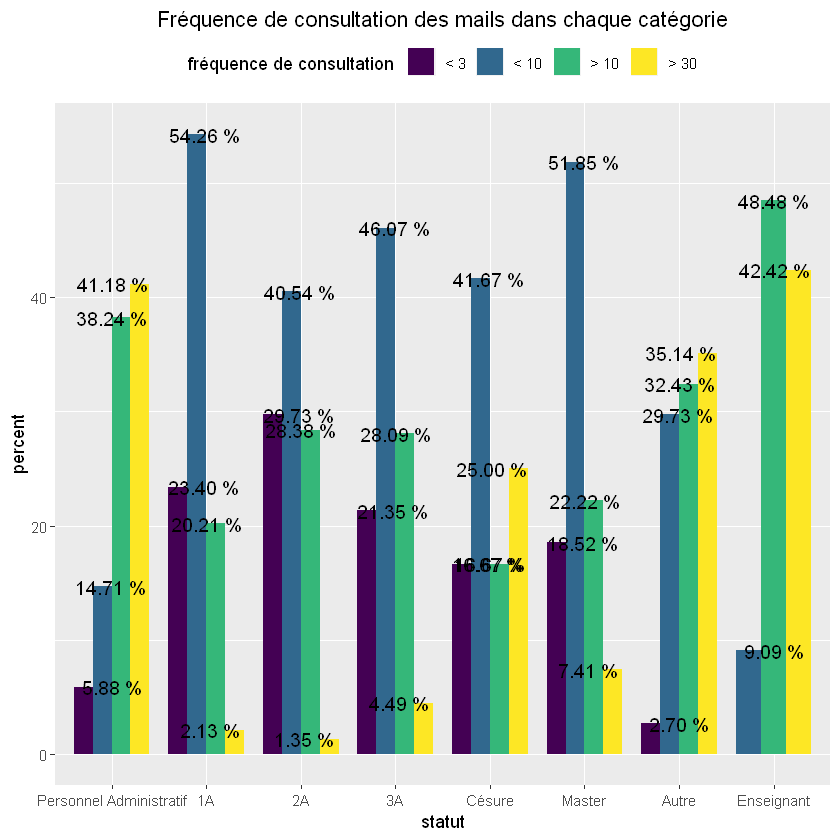

In [24]:


## add a new column with nn.nn% : format(round(d2$perc*100, 2), nsmall = 2) to round and formatt decimals
df2$lab <- paste(format(round(df2$perc*100, 2), nsmall = 2), "%") 

ggplot(df2, aes(x = factor(statut), y = perc*100, fill = factor(fréquence.de.consultation.de.la.messagerie))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Fréquence de consultation des mails dans chaque catégorie")+
  labs(x = "statut", y = "percent", fill = "fréquence de consultation") +
  scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df2,aes(x=statut,y=perc*100,label=lab),position = position_dodge(width = 0.05), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

In [25]:
head(df2)

statut,fréquence.de.consultation.de.la.messagerie,count,perc,lab
1A,< 10,51,0.5425532,54.26 %
1A,< 3,22,0.2340426,23.40 %
1A,> 10,19,0.2021277,20.21 %
1A,> 30,2,0.0212766,2.13 %
2A,< 10,30,0.4054054,40.54 %
2A,< 3,22,0.2972973,29.73 %


### En fonction de l'expérience professionnelle

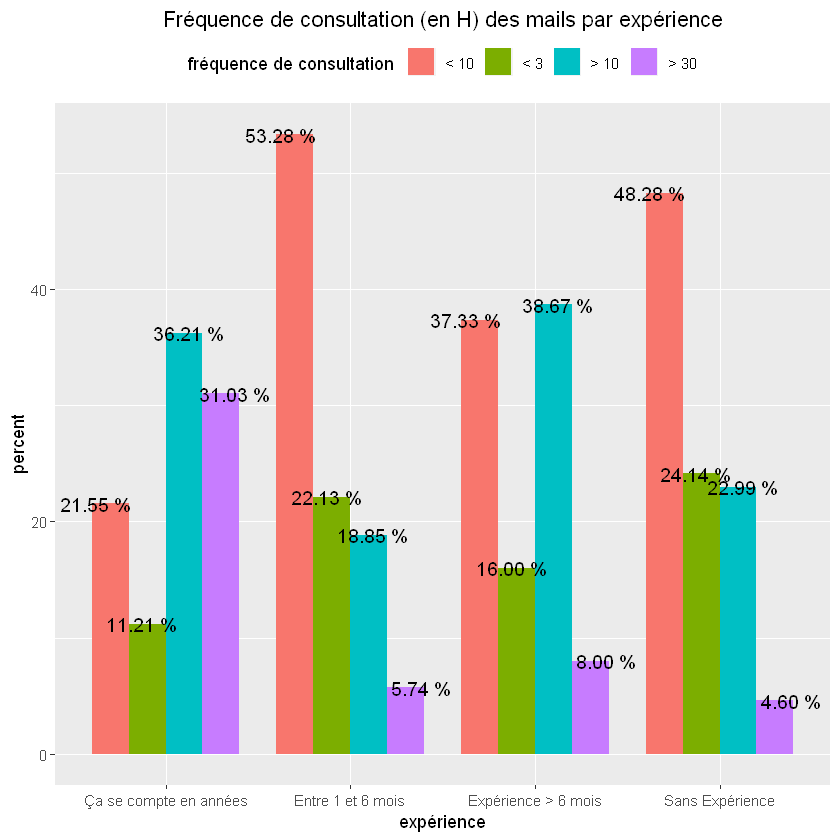

In [26]:
## new dataframe to add count and percentage columns, look df3 below
df3 <- cleaned_data %>% 
  group_by(expérience.professionnelle,fréquence.de.consultation.de.la.messagerie) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df3$lab <- paste(format(round(df3$perc*100, 2), nsmall = 2), "%") 

ggplot(df3, aes(x = factor(expérience.professionnelle), y = perc*100, fill = factor(fréquence.de.consultation.de.la.messagerie))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Fréquence de consultation (en H) des mails par expérience")+
  labs(x = "expérience", y = "percent", fill = "fréquence de consultation") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df3,aes(x=expérience.professionnelle,y=perc*100,label=lab),position = position_dodge(width = 1), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

In [27]:
df3

expérience.professionnelle,fréquence.de.consultation.de.la.messagerie,count,perc,lab
Ça se compte en années,< 10,25,0.21551724,21.55 %
Ça se compte en années,< 3,13,0.11206897,11.21 %
Ça se compte en années,> 10,42,0.36206897,36.21 %
Ça se compte en années,> 30,36,0.31034483,31.03 %
Entre 1 et 6 mois,< 10,65,0.53278689,53.28 %
Entre 1 et 6 mois,< 3,27,0.22131148,22.13 %
Entre 1 et 6 mois,> 10,23,0.18852459,18.85 %
Entre 1 et 6 mois,> 30,7,0.05737705,5.74 %
Expérience > 6 mois,< 10,28,0.37333333,37.33 %
Expérience > 6 mois,< 3,12,0.16000000,16.00 %


#### En fonction des notifications

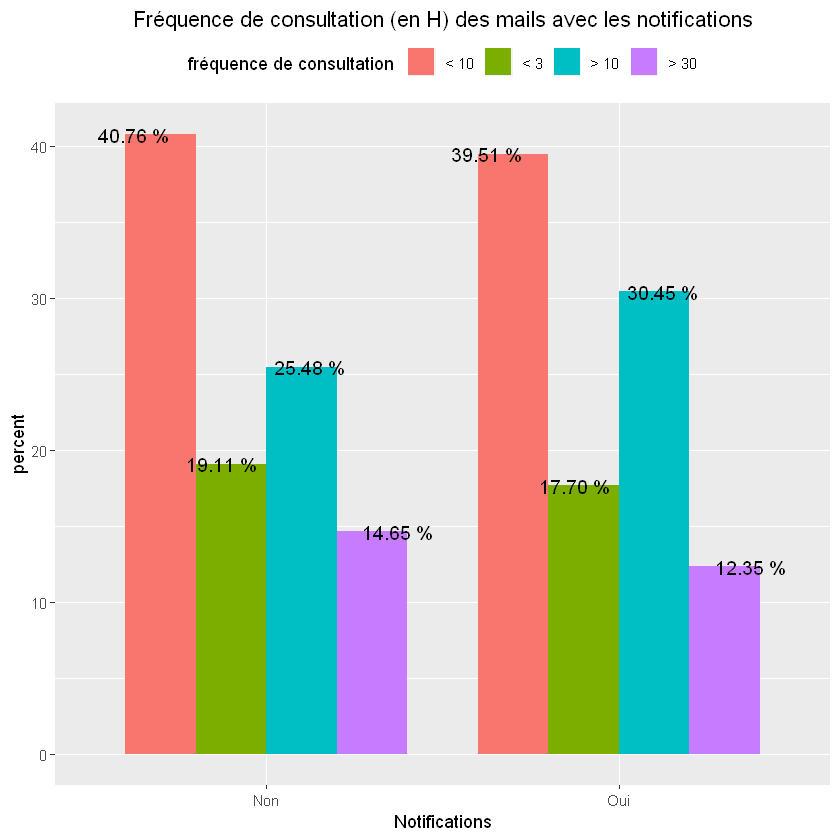

In [28]:
## new dataframe to add count and percentage columns, look df3 below
df4 <- cleaned_data %>% 
  group_by(notification.de.mails,fréquence.de.consultation.de.la.messagerie) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df4$lab <- paste(format(round(df4$perc*100, 2), nsmall = 2), "%") 

ggplot(df4, aes(x = factor(notification.de.mails), y = perc*100, fill = factor(fréquence.de.consultation.de.la.messagerie))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Fréquence de consultation (en H) des mails avec les notifications")+
  labs(x = "Notifications", y = "percent", fill = "fréquence de consultation") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df4,aes(x=notification.de.mails,y=perc*100,label=lab),position = position_dodge(width = 1), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

#### En fonction de l'appareil utilisé

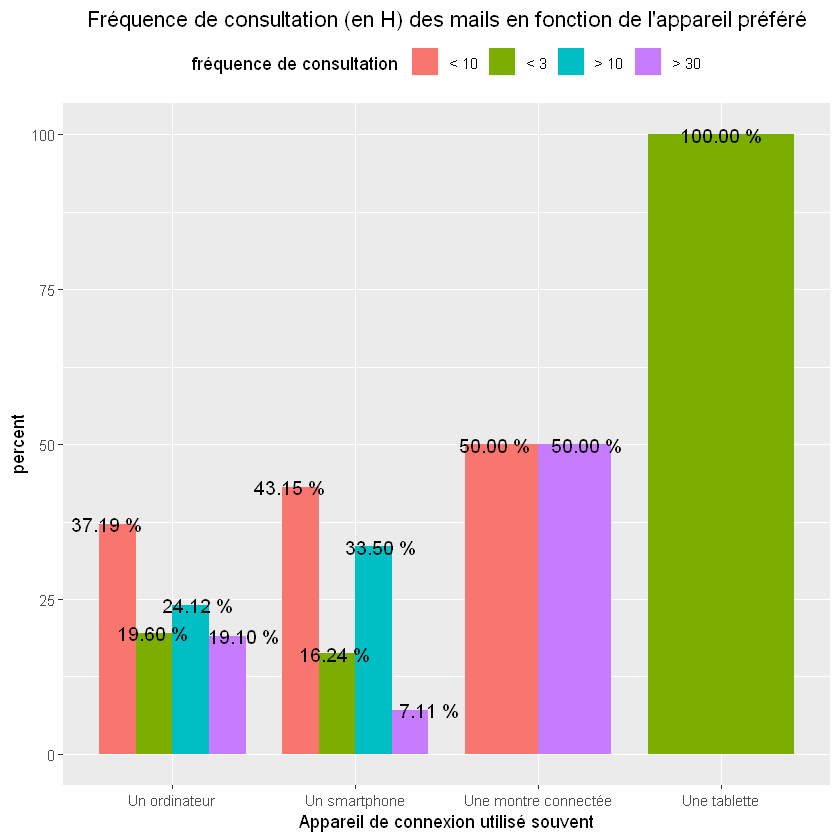

In [29]:
## new dataframe to add count and percentage columns, look df3 below
df5 <- cleaned_data %>% 
  group_by(appareil.préféré.de.consultation,fréquence.de.consultation.de.la.messagerie) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df5$lab <- paste(format(round(df5$perc*100, 2), nsmall = 2), "%") 

ggplot(df5, aes(x = factor(appareil.préféré.de.consultation), y = perc*100, fill = factor(fréquence.de.consultation.de.la.messagerie))) +
  geom_bar(stat="identity", width = 0.8, position = "dodge") +
  ggtitle("Fréquence de consultation (en H) des mails en fonction de l'appareil préféré")+
  labs(x = "Appareil de connexion utilisé souvent", y = "percent", fill = "fréquence de consultation") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df5,aes(x=appareil.préféré.de.consultation,y=perc*100,label=lab),position = position_dodge(width = 1), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

#### Appareil préféré par statut

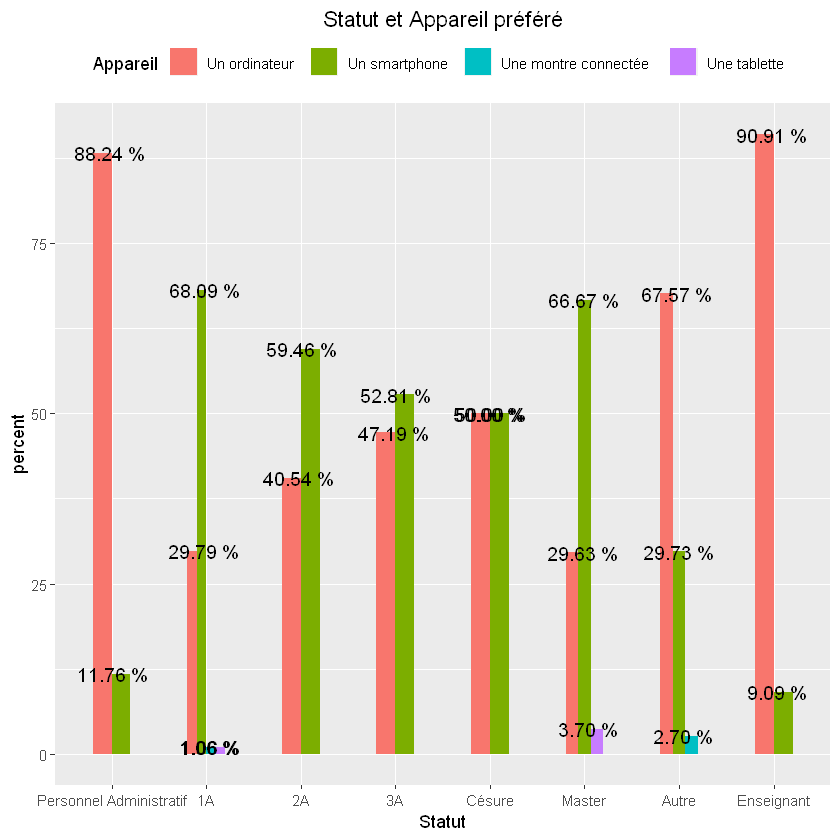

In [30]:
## new dataframe to add count and percentage columns, look df3 below
df6 <- cleaned_data %>% 
  group_by(statut,appareil.préféré.de.consultation) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df6$lab <- paste(format(round(df6$perc*100, 2), nsmall = 2), "%") 

ggplot(df6, aes(x = factor(statut), y = perc*100, fill = factor(appareil.préféré.de.consultation))) +
  geom_bar(stat="identity", width = 0.4, position = "dodge") +
  ggtitle("Statut et Appareil préféré")+
  labs(x = "Statut", y = "percent", fill = "Appareil") +
  scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df6,aes(x=statut,y=perc*100,label=lab),position = position_dodge(width = 0.05), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

In [31]:
head(df6)

statut,appareil.préféré.de.consultation,count,perc,lab
1A,Un ordinateur,28,0.2978723,29.79 %
1A,Un smartphone,64,0.6808511,68.09 %
1A,Une montre connectée,1,0.0106383,1.06 %
1A,Une tablette,1,0.0106383,1.06 %
2A,Un ordinateur,30,0.4054054,40.54 %
2A,Un smartphone,44,0.5945946,59.46 %


## Nombre de mails envoyés par semaine

### Age et Envoi des mails par semaine

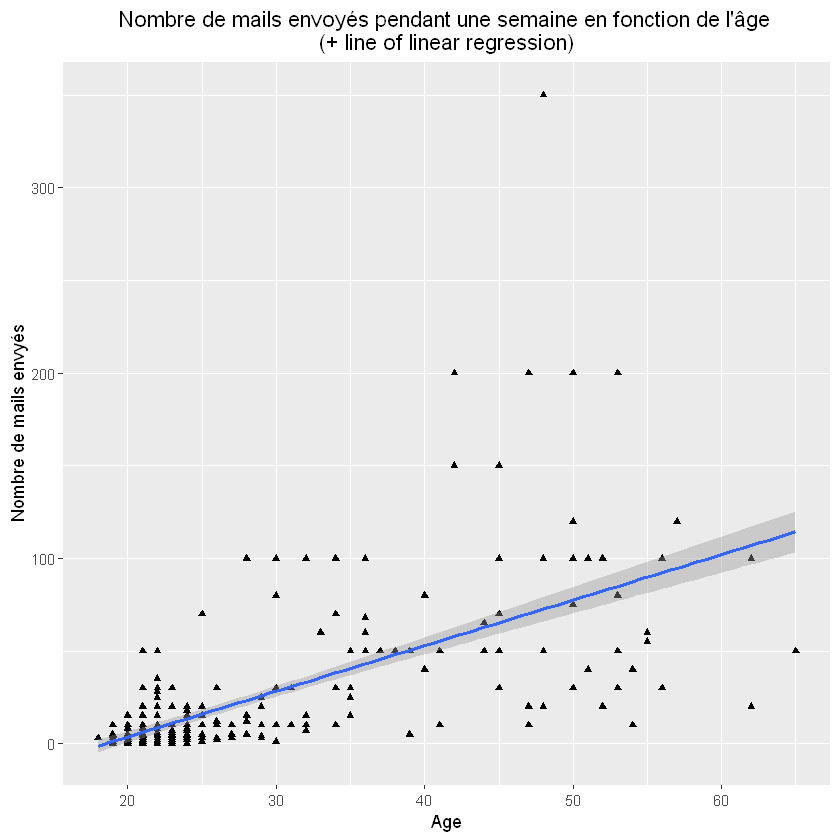

In [32]:
a <- ggplot(cleaned_data, aes(x=age, y=nombre.de.mails.envoyés.par.semaine))

## add a regression line
a + geom_point(shape=17)+
    ggtitle("Nombre de mails envoyés pendant une semaine en fonction de l'âge \n(+ line of linear regression)")+
    geom_smooth(method = "lm") +
    labs(x = "Age", y = "Nombre de mails envyés")+
    theme(plot.title = element_text(hjust = 0.5))

### Expérience et envoi des mails

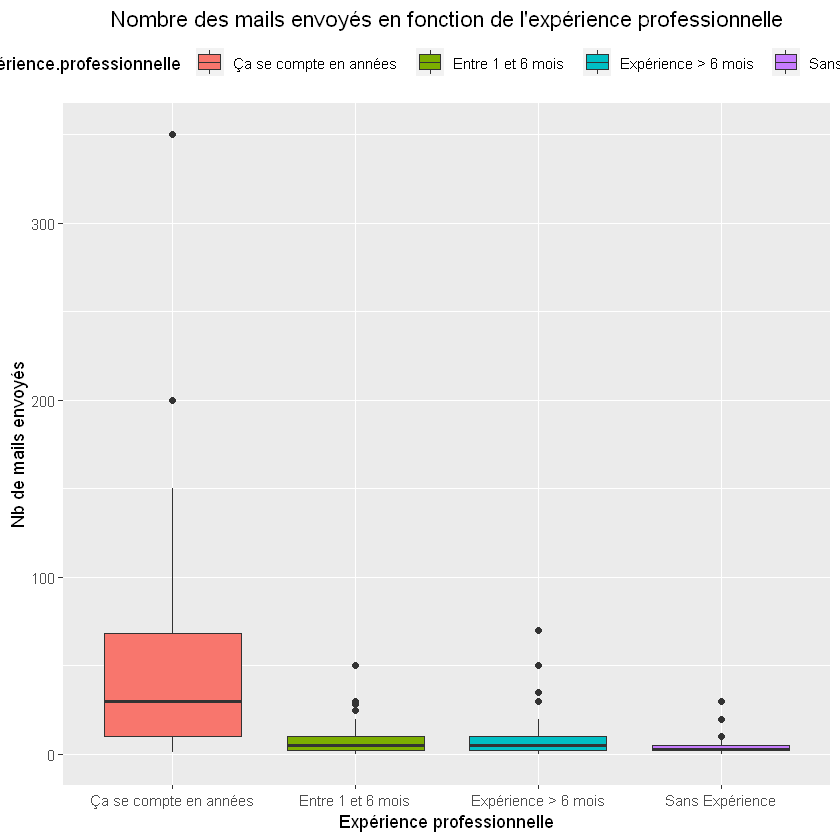

In [33]:
ggplot(cleaned_data, aes(x=expérience.professionnelle, y=nombre.de.mails.envoyés.par.semaine, fill=expérience.professionnelle))+
    geom_boxplot()+
    labs(title="Nombre des mails envoyés en fonction de l'expérience professionnelle",x="Expérience professionnelle", y = "Nb de mails envoyés")+    
    theme(legend.position = "top", plot.title = element_text(hjust = 0.5))

### Statut et envoi des mails

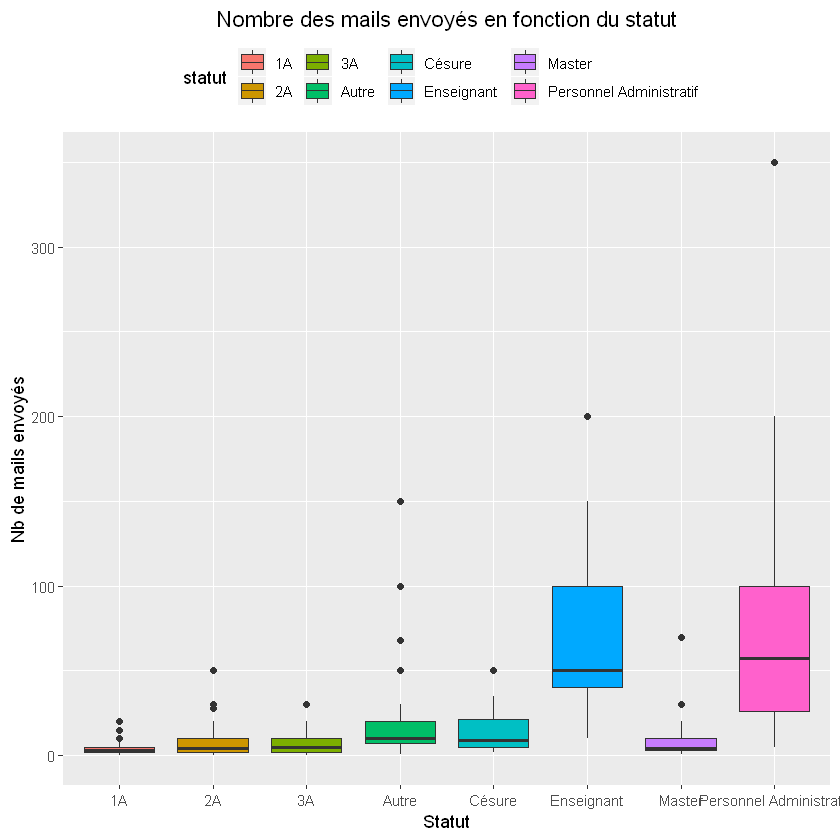

In [34]:
ggplot(cleaned_data, aes(x=statut, y=nombre.de.mails.envoyés.par.semaine, fill=statut))+
    geom_boxplot()+
    labs(title="Nombre des mails envoyés en fonction du statut",x="Statut", y = "Nb de mails envoyés")+    
    theme(legend.position = "top", plot.title = element_text(hjust = 0.5))

### Relation entre mails envoyés et reçus

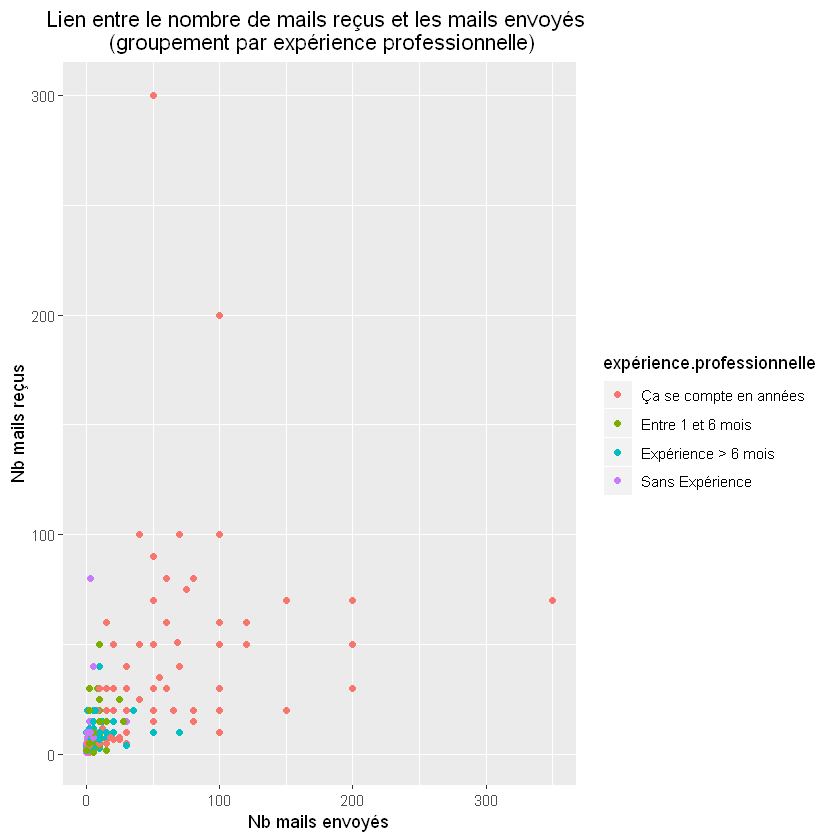

In [35]:
ggplot(cleaned_data, aes(x=nombre.de.mails.envoyés.par.semaine, nombre.de.mails.reçus.par.jour, color=expérience.professionnelle))+
    geom_point()+
    ggtitle("Lien entre le nombre de mails reçus et les mails envoyés \n (groupement par expérience professionnelle)")+
    labs(x = "Nb mails envoyés", y = "Nb mails reçus")+
    theme(plot.title = element_text(hjust = 0.5))

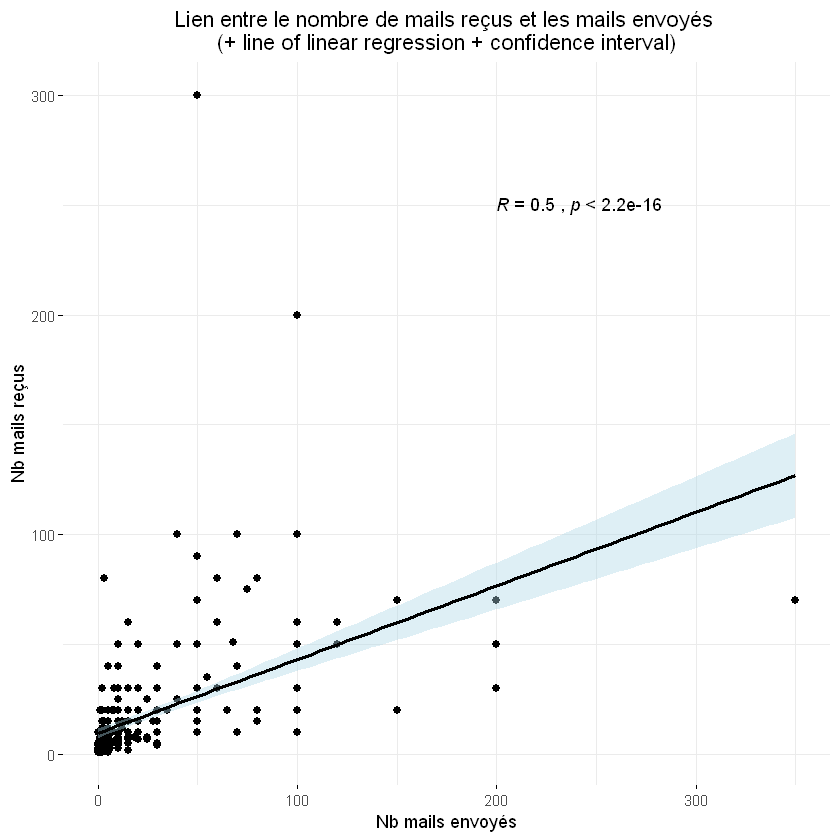

In [36]:
ggscatter(cleaned_data, x = "nombre.de.mails.envoyés.par.semaine", y = "nombre.de.mails.reçus.par.jour",
          add = "reg.line", conf.int = TRUE,    
          add.params = list(fill = "lightblue"),
          ggtheme = theme_minimal()
          )+
    ggtitle("Lien entre le nombre de mails reçus et les mails envoyés \n(+ line of linear regression + confidence interval)")+
    labs(x = "Nb mails envoyés", y = "Nb mails reçus")+
    theme(plot.title = element_text(hjust = 0.5))+
    stat_cor(method = "pearson", label.x = 200, label.y = 250)

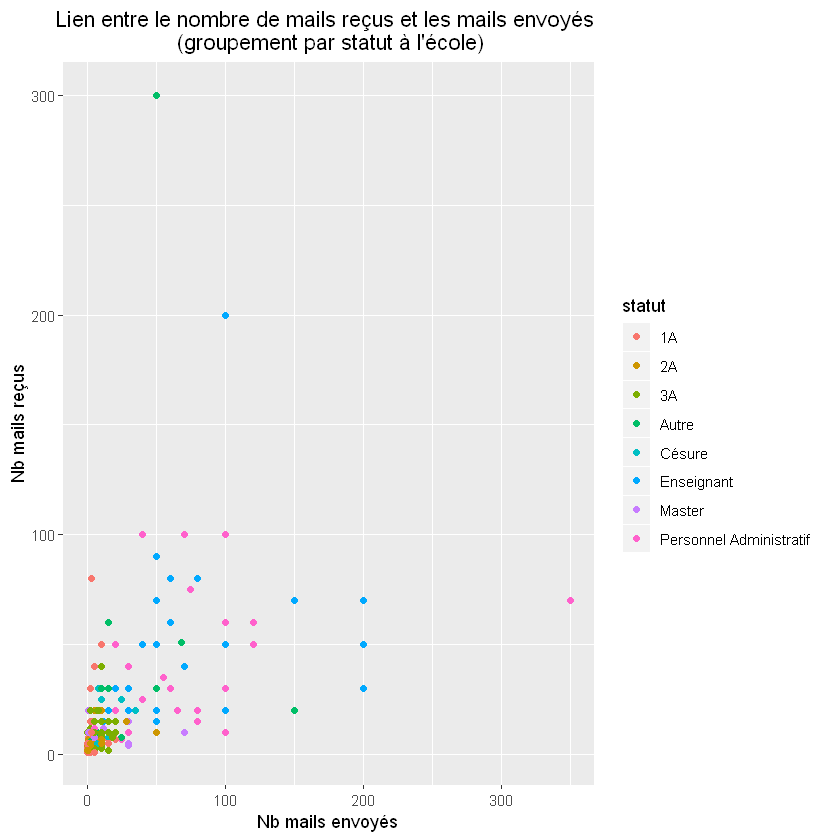

In [37]:
ggplot(cleaned_data, aes(x=nombre.de.mails.envoyés.par.semaine, nombre.de.mails.reçus.par.jour, color=statut))+
    geom_point()+
    ggtitle("Lien entre le nombre de mails reçus et les mails envoyés \n (groupement par statut à l'école)")+
    labs(x = "Nb mails envoyés", y = "Nb mails reçus")+
    theme(plot.title = element_text(hjust = 0.5))

# Consultation en dehors du service

In [38]:
cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études<-as.character(cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études)
cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études[cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études=="oui"] <- "Oui"

### Par age

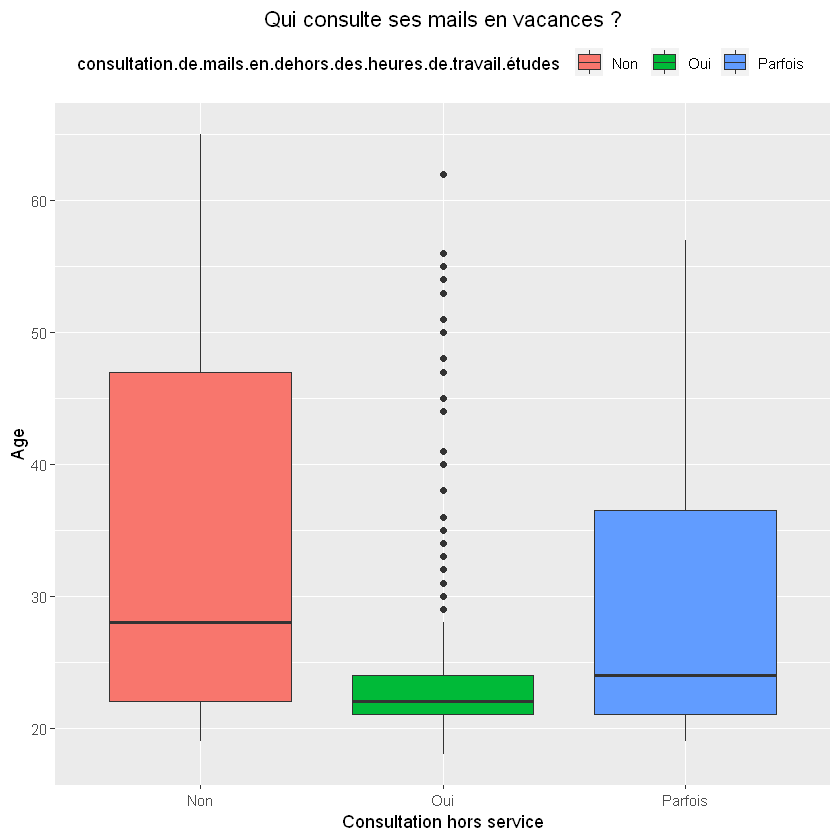

In [39]:
ggplot(cleaned_data, aes(x=consultation.de.mails.en.dehors.des.heures.de.travail.études, y=age, fill=consultation.de.mails.en.dehors.des.heures.de.travail.études))+
    geom_boxplot()+
    labs(title="Qui consulte ses mails en vacances ?",x="Consultation hors service", y = "Age")+    
    theme(legend.position = "top", plot.title = element_text(hjust = 0.5))

### Par Statut

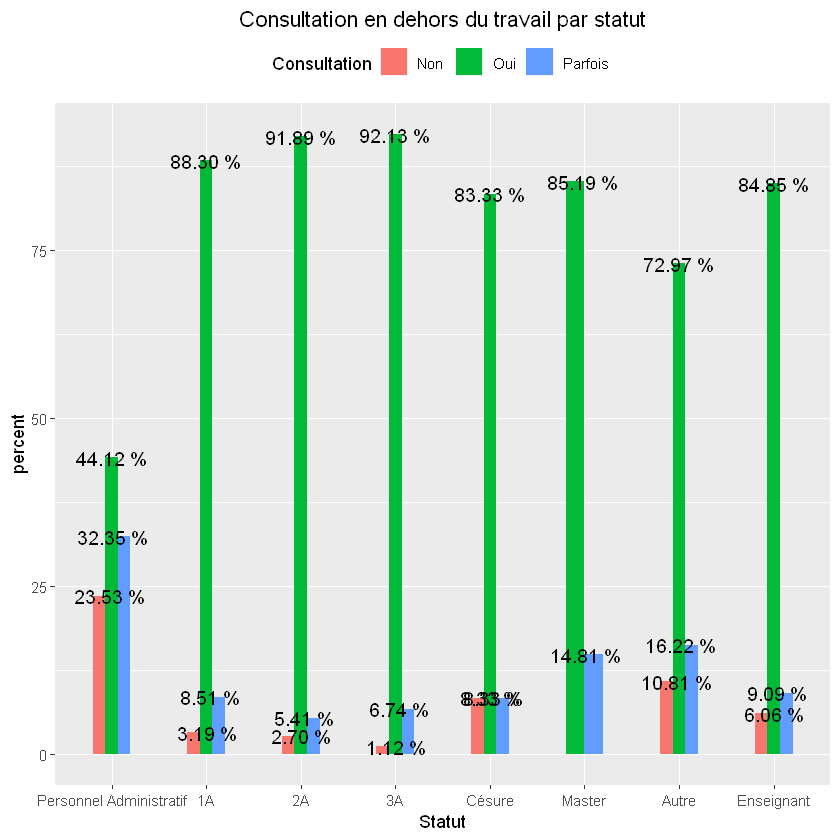

In [40]:
df11 <- cleaned_data %>% 
  group_by(statut,consultation.de.mails.en.dehors.des.heures.de.travail.études) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df11$lab <- paste(format(round(df11$perc*100, 2), nsmall = 2), "%") 

ggplot(df11, aes(x = factor(statut), y = perc*100, fill = factor(consultation.de.mails.en.dehors.des.heures.de.travail.études))) +
  geom_bar(stat="identity", width = 0.4, position = "dodge") +
  ggtitle("Consultation en dehors du travail par statut")+
  labs(x = "Statut", y = "percent", fill = "Consultation") +
  scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df11,aes(x=statut,y=perc*100,label=lab),position = position_dodge(width = 0.05), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

### Par Expérience

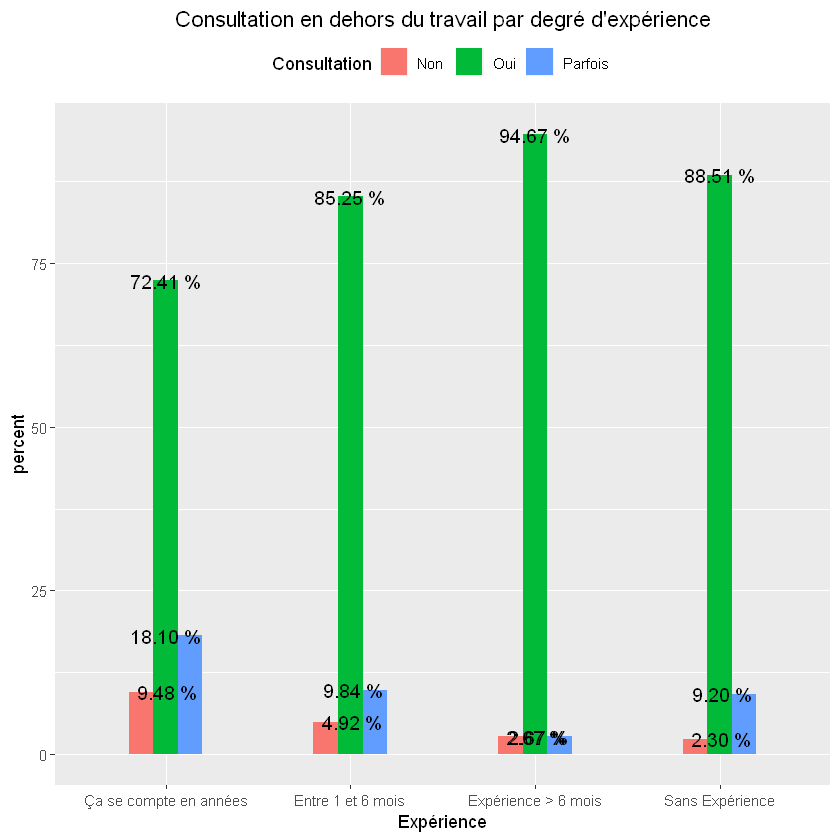

In [41]:
df12 <- cleaned_data %>% 
  group_by(expérience.professionnelle,consultation.de.mails.en.dehors.des.heures.de.travail.études) %>% 
  summarise(count=n()) %>% 
  mutate(perc=count/sum(count))

## add a new column with nn.nn% : format(round(df3$perc*100, 2), nsmall = 2) to round and formatt decimals
df12$lab <- paste(format(round(df12$perc*100, 2), nsmall = 2), "%") 

ggplot(df12, aes(x = factor(expérience.professionnelle), y = perc*100, fill = factor(consultation.de.mails.en.dehors.des.heures.de.travail.études))) +
  geom_bar(stat="identity", width = 0.4, position = "dodge") +
  ggtitle("Consultation en dehors du travail par degré d'expérience")+
  labs(x = "Expérience", y = "percent", fill = "Consultation") +
  #scale_x_discrete(limits = c("Personnel Administratif","1A","2A","3A","Césure","Master","Autre","Enseignant"))+
  geom_text(data=df12,aes(x=expérience.professionnelle,y=perc*100,label=lab),position = position_dodge(width = 0.01), size = 4) +
  theme(legend.position = "top", plot.title = element_text(hjust = 0.5))
  #theme_minimal(base_size = 14)

### Age et nombre de boites mail

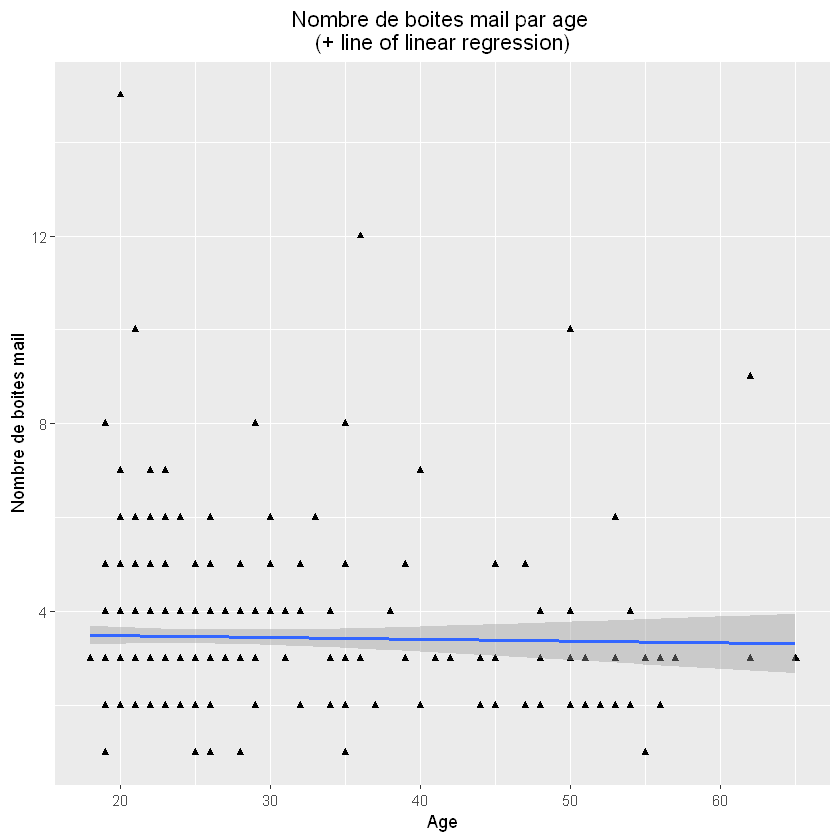

In [42]:
c <- ggplot(cleaned_data, aes(x=age, y=nombre.de.boites.mail))

## add a regression line
c + geom_point(shape=17)+
    ggtitle("Nombre de boites mail par age \n(+ line of linear regression)")+
    geom_smooth(method = "lm") +
    labs(x = "Age", y = "Nombre de boites mail")+
    theme(plot.title = element_text(hjust = 0.5))
    
  
# Add regression line and confidence interval
# Add correlation coefficient: stat_cor()

# Add a loess smoothed fit curve
#b + geom_point(shape=24, col="blue")+
#  geom_smooth(method = "loess") 

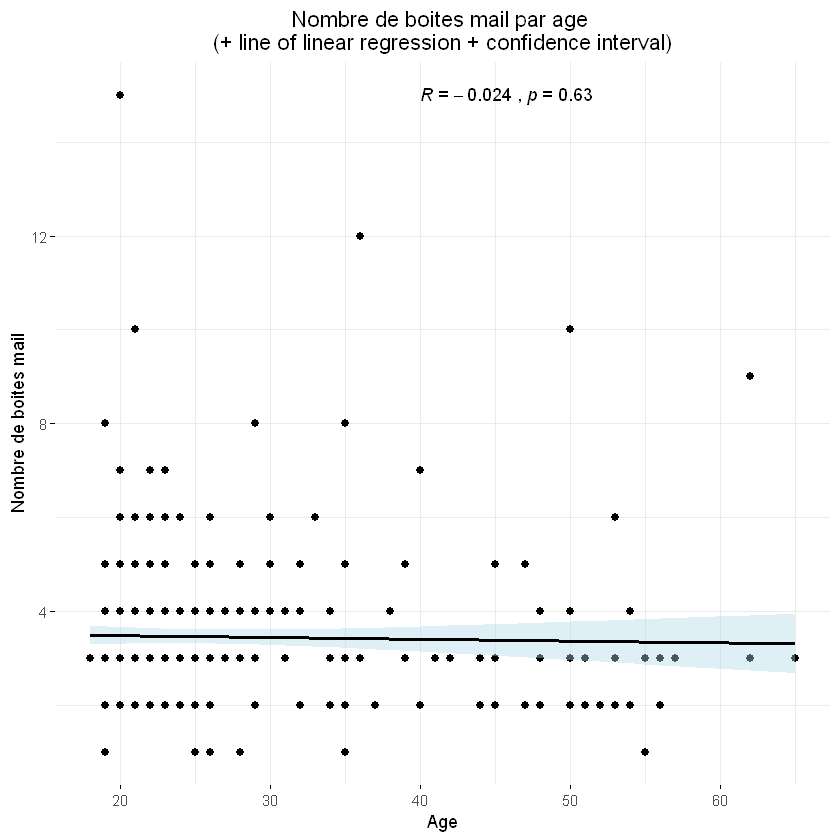

In [43]:
ggscatter(cleaned_data, x = "age", y = "nombre.de.boites.mail",
          add = "reg.line", conf.int = TRUE,    
          add.params = list(fill = "lightblue"),
          ggtheme = theme_minimal()
          )+
    ggtitle("Nombre de boites mail par age \n(+ line of linear regression + confidence interval)")+
    labs(x = "Age", y = "Nombre de boites mail")+
    theme(plot.title = element_text(hjust = 0.5))+
    stat_cor(method = "pearson", label.x = 40, label.y = 15)

## Consultation  en dehors du service

In [44]:
names(cleaned_data)

[1] "X"                                                           
 [2] "statut"                                                      
 [3] "age"                                                         
 [4] "expérience.professionnelle"                                  
 [5] "temps.passé.moyen.sur.internet"                              
 [6] "appareil.préféré.de.consultation"                            
 [7] "nombre.de.boites.mail"                                       
 [8] "nombre.de.messagerie.consultées.régulièrement"               
 [9] "fréquence.de.consultation.de.la.messagerie"                  
[10] "nombre.de.mails.reçus.par.jour"                              
[11] "concerné"                                                    
[12] "notification.de.mails"                                       
[13] "lecture.de.tous.les.mails"                                   
[14] "lecture.de.l.objet.expéditeur"                               
[15] "nombre.de.mails.non.lus"                                     
[16] "nombre.de.mails.envoyés.par.semaine"                         
[17] "réponse.à.des.mails.nécessitant.une.réponse"                 
[18] "consultation.de.mails.en.dehors.des.heures.de.travail.études"
[19] "personnalisation.de.la.messagerie"                           
[20] "importance.de.l.ergonomie"                                   
[21] "sentiment.envers.de.zéro.inbox"                              
[22] "autre.fonctionnalité.de.la.boite.mail"

## Correlation entre variables

In [45]:
### Statut ou age en fonction de lecture de tous les mails

In [46]:
names(cleaned_data)

[1] "X"                                                           
 [2] "statut"                                                      
 [3] "age"                                                         
 [4] "expérience.professionnelle"                                  
 [5] "temps.passé.moyen.sur.internet"                              
 [6] "appareil.préféré.de.consultation"                            
 [7] "nombre.de.boites.mail"                                       
 [8] "nombre.de.messagerie.consultées.régulièrement"               
 [9] "fréquence.de.consultation.de.la.messagerie"                  
[10] "nombre.de.mails.reçus.par.jour"                              
[11] "concerné"                                                    
[12] "notification.de.mails"                                       
[13] "lecture.de.tous.les.mails"                                   
[14] "lecture.de.l.objet.expéditeur"                               
[15] "nombre.de.mails.non.lus"                                     
[16] "nombre.de.mails.envoyés.par.semaine"                         
[17] "réponse.à.des.mails.nécessitant.une.réponse"                 
[18] "consultation.de.mails.en.dehors.des.heures.de.travail.études"
[19] "personnalisation.de.la.messagerie"                           
[20] "importance.de.l.ergonomie"                                   
[21] "sentiment.envers.de.zéro.inbox"                              
[22] "autre.fonctionnalité.de.la.boite.mail"

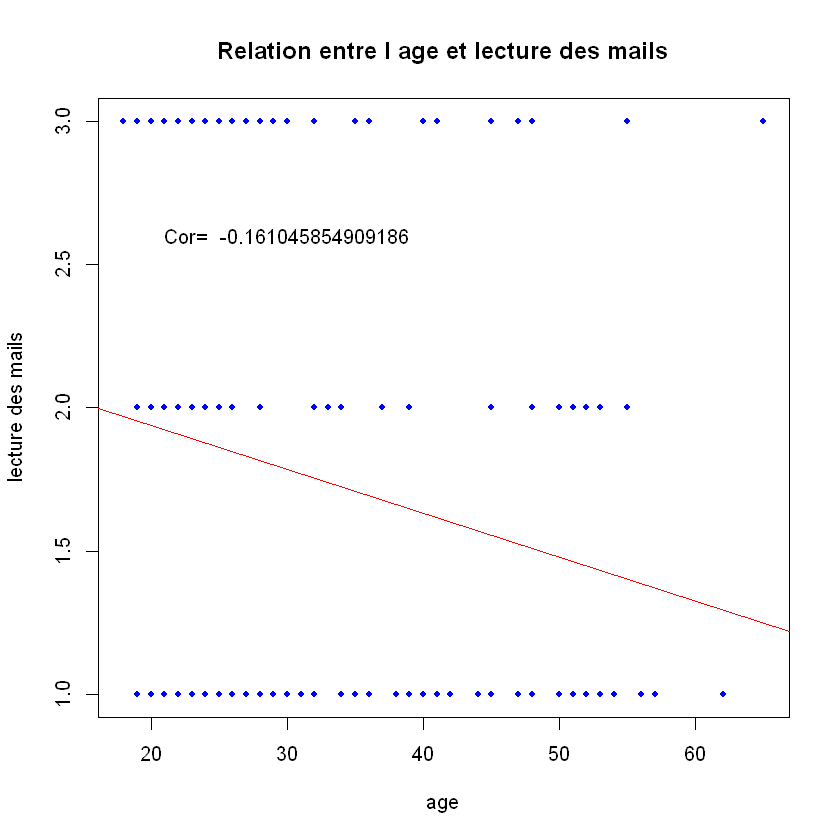

In [47]:
reg <-lm(as.numeric(cleaned_data$lecture.de.tous.les.mails)~cleaned_data$age)
plot(cleaned_data$age, as.numeric(cleaned_data$lecture.de.tous.les.mails), main="Relation entre l age et lecture des mails", ylab="lecture des mails",
     xlab="age",    col="blue", pch=20)
abline(reg, col="Red") ## add a line in this case a regression line
correl <- cor(cleaned_data$age, as.numeric(cleaned_data$lecture.de.tous.les.mails))
text(30,2.6, paste("Cor= ",correl))

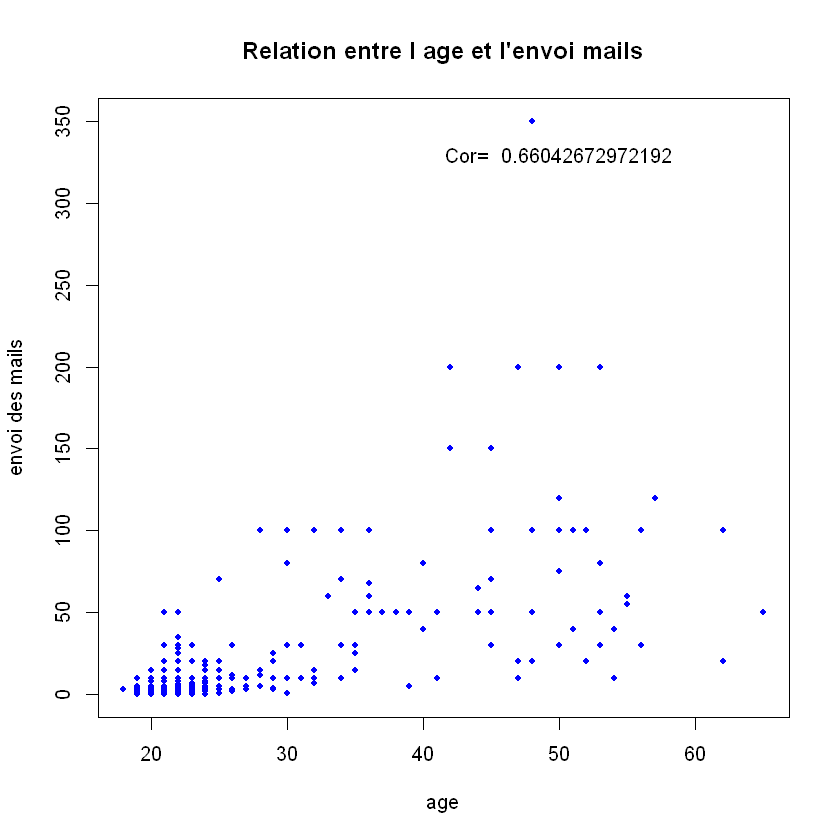

In [48]:
#reg <-lm(as.numeric(cleaned_data$lecture.de.tous.les.mails)~cleaned_data$age)
plot(cleaned_data$age, cleaned_data$nombre.de.mails.envoyés.par.semaine, main="Relation entre l age et l'envoi mails", ylab="envoi des mails",
     xlab="age",    col="blue", pch=20)
#abline(reg, col="Red") ## add a line in this case a regression line
correl <- cor(cleaned_data$age, cleaned_data$nombre.de.mails.envoyés.par.semaine)
text(50,330, paste("Cor= ",correl))

Warning message in is.data.frame(y):
"NAs introduits lors de la conversion automatique"

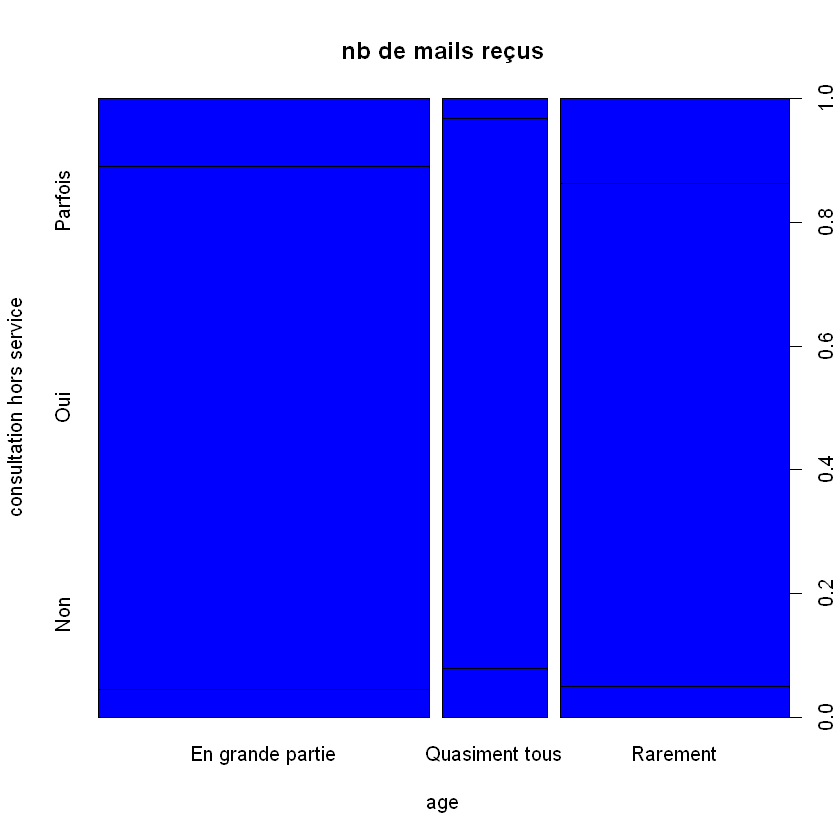

In [49]:
#reg <-lm(as.numeric(cleaned_data$lecture.de.tous.les.mails)~cleaned_data$age)
#table(cleaned_data$lecture.de.tous.les.mails)
#table(cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études)
plot(as.factor(cleaned_data$lecture.de.tous.les.mails), as.factor(cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études), 
     main="nb de mails reçus", ylab="consultation hors service",  xlab="age", col="blue", pch=20)
#abline(reg, col="Red") ## add a line in this case a regression line
correl <- cor(as.numeric(cleaned_data$lecture.de.tous.les.mails), as.numeric(cleaned_data$consultation.de.mails.en.dehors.des.heures.de.travail.études))
text(2,3.5, paste("Cor= ",correl))